### `Introduction`

Video games have become very important in modern entertainment. From simple pixelated games to detailed reallistic games. Millions of people play video games regularly. There is a wide range of video games with different qualities. Some video games seem to be very popular, while others don't get much attention. These video games also come with a wide range of prices. Some video games are categorized as "triple A" games, which means that they should be high quality and thus come with a high price. A lot of other video games are categorized as "indie" games, which means they have a lower budget and are much more simple. 

In this data story we are going to explore the difference between triple A games and indie games. We are going to focus on the price and succes of video games. With the rising prices of video games our main question is: "Does the price of a video game influence the succes of a video game?" We define the succes of a video game in different factors such as sales, players and review scores. We will be comparing these factors to the price for both tiple A games and indie games. Our first perspective is that triple A games should be more succesfull than indie games since they have a higher budget, thus the quality should be better. Our second perspective is that indie games are cheaper and require less computational power so more people are able to afford and play the video game.

## Datasets and Preprocessing

We have chosen a variety of datasets to include a lot of variables. We mainly use `steam_reviews_revenue.csv` which is a modified version of the [steam](https://www.kaggle.com/datasets/nikdavis/steam-store-games) dataset. Steam is the most used game launcher for PC's and desktops. We modified this dataset with a few extra variables such as is_aaa, Estimated Revenue and review_ratio. We've created a list containing the biggest videogame publishers: if a game's publishers is in this list, that entry's is_aaa is set to. Otherwise its value is 0. Estimated Revenue, along with the Launch Price variable, was taken from the [Steam Trends 2023](https://docs.google.com/spreadsheets/d/1D5MErWbFJ2Gsde9QxJ_HNMltKfF6fHCYdv4OQpXdnZ4/edit?gid=1714749788#gid=1714749788) dataset. They were merged with the steam dataset on the game's name. For review_ratio, we first calculated the total number of reviews for a game (positive_ratings + negative_ratings). The amount of positive reviews is then devided by total reviews. \
Other datasets used: \
`player_count.csv`: [this dataset](https://www.kaggle.com/datasets/faisaljanjua0555/most-played-games-of-all-time) contains various playercount stats, including all time peak. \
`result.csv`: [this dataset](https://www.kaggle.com/datasets/destring/metacritic-reviewed-games-since-2000) contains metascores (0-100) of various games. These come from Metacritic, which is a highly trusted game review website. \
`vgsales.csv`: [this dataset](https://www.kaggle.com/datasets/gregorut/videogamesales) contains the revenue of a large selection of console games that sold over 100000 copies. \
These datasets were all merged with the [steam](https://www.kaggle.com/datasets/nikdavis/steam-store-games) dataset on name.

In [11]:
# Import packages
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Price compared to amount of players


First of all we want to discover what the correlation between the price of a game and the amount of players that play the game is. Furthermore we want to explore the difference between AAA-games and Indie-games. To do so we have used the following dataset: https://www.kaggle.com/datasets/faisaljanjua0555/most-played-games-of-all-time combined with another dataset: https://www.kaggle.com/datasets/nikdavis/steam-store-games. In the first dataset "current" indicates the amount of players a game has right now, "24th peak" the amount of players a game had on it's 24th peak and "all time peak" the highest amount of players a game has ever had. To emphasize the difference between AAA-games and Indie-games, we have split the data into those two categories. These categories are again split into three subdivisons depended on the price of a game. The length of the bar is depended on the avarage amount of players over the games in the according category.


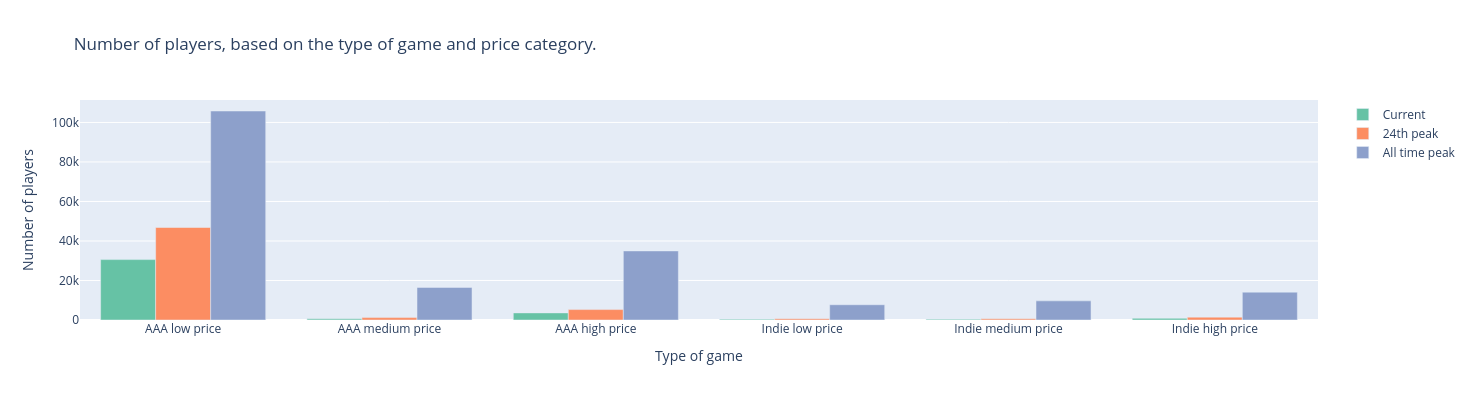

In [12]:
df1 = pd.read_csv('DATASETS/aaa_published_games.csv')
df1 = df1[['name', 'price']]
df2 = pd.read_csv('DATASETS/indie_published_games.csv')
df2 = df2[['name', 'price']]
df3 = pd.read_csv('DATASETS/player_count.csv')
df1 = df1.merge(df3, how='inner', on='name')
df2 = df2.merge(df3, how='inner', on='name')
df1['Type of game']='AAA'
df2['Type of game']='Indie'
df = df1.merge(df2, how='outer')
df = df.drop(columns=['Unnamed: 5'])

AAA = df[df["Type of game"]=='AAA']
AAA.loc[:, 'Current'] = pd.to_numeric(AAA['Current'], errors='coerce')
AAA.loc[:, '24th Peak'] = pd.to_numeric(AAA['24th Peak'], errors='coerce')
AAA.loc[:, 'All_time peak'] = pd.to_numeric(AAA['All_time peak'], errors='coerce')
AAA_price_categories = pd.qcut(AAA["price"], 3, retbins=True, labels=["Low", "Medium", "High"])
AAA['price_category'] = AAA_price_categories[0]

AAA_low = AAA[AAA["price_category"]=="Low"]
AAA_current_low = AAA_low['Current'].mean() 
AAA_24th_low = AAA_low['24th Peak'].mean()
AAA_all_time_low = AAA_low['All_time peak'].mean()

AAA_medium = AAA[AAA["price_category"]=="Medium"]
AAA_current_medium = AAA_medium['Current'].mean() 
AAA_24th_medium = AAA_medium['24th Peak'].mean()
AAA_all_time_medium = AAA_medium['All_time peak'].mean()

AAA_high = AAA[AAA["price_category"]=="High"]
AAA_current_high = AAA_high['Current'].mean() 
AAA_24th_high = AAA_high['24th Peak'].mean()
AAA_all_time_high = AAA_high['All_time peak'].mean()

Indie = df[df["Type of game"]=='Indie']
Indie.loc[:, 'Current'] = pd.to_numeric(Indie['Current'], errors='coerce')
Indie.loc[:, '24th Peak'] = pd.to_numeric(Indie['24th Peak'], errors='coerce')
Indie.loc[:, 'All_time peak'] = pd.to_numeric(Indie['All_time peak'], errors='coerce')
Indie_price_categories = pd.qcut(Indie["price"], 3, retbins=True, labels=["Low", "Medium", "High"])
Indie['price_category'] = Indie_price_categories[0]

Indie_low = Indie[Indie["price_category"]=="Low"]
Indie_current_low = Indie_low['Current'].mean() 
Indie_24th_low = Indie_low['24th Peak'].mean()
Indie_all_time_low = Indie_low['All_time peak'].mean()

Indie_medium = Indie[Indie["price_category"]=="Medium"]
Indie_current_medium = Indie_medium['Current'].mean() 
Indie_24th_medium = Indie_medium['24th Peak'].mean()
Indie_all_time_medium = Indie_medium['All_time peak'].mean()

Indie_high = Indie[Indie["price_category"]=="High"]
Indie_current_high = Indie_high['Current'].mean() 
Indie_24th_high = Indie_high['24th Peak'].mean()
Indie_all_time_high = Indie_high['All_time peak'].mean()

data = [['AAA low price', AAA_current_low, AAA_24th_low, AAA_all_time_low], ['AAA medium price', AAA_current_medium, AAA_24th_medium, AAA_all_time_medium], ['AAA high price', AAA_current_high, AAA_24th_high, AAA_all_time_high], ['Indie low price', Indie_current_low, Indie_24th_low, Indie_all_time_low], ['Indie medium price', Indie_current_medium, Indie_24th_medium, Indie_all_time_medium], ['Indie high price', Indie_current_high, Indie_24th_high, Indie_all_time_high]]
df = pd.DataFrame(data, columns=['Type of game', 'Current', '24th peak', 'All time peak'])

trace =[
    go.Bar(name='Current ', x = df['Type of game'], y = df['Current'], marker_color='rgb(102,194,165)'),
    go.Bar(name='24th peak', x = df['Type of game'], y = df['24th peak'], marker_color='rgb(252,141,98)'),
    go.Bar(name='All time peak', x = df['Type of game'], y = df['All time peak'], marker_color='rgb(141,160,203)'),
]

layout = go.Layout(
    xaxis=go.layout.XAxis(
        type='category'
    ),
    yaxis=go.layout.YAxis(
    )
)
fig = go.Figure(data=trace, layout=layout)
fig.update_layout(
    title_text='Number of players, based on the type of game and price category.',
    xaxis_title='Type of game',
    yaxis_title='Number of players',
    height=400
)
fig.show()

You can draw some interesting conclusions based on the stacked barplot. The first thing that is remarkable is the fact that the amount of players that play AAA-games is overall a lot higher than the amount of players that play Indie games. A second interesting thing you may notice is the fact that the number of players is getting bigger when the price is getting higher, except for the AAA-games low price category. That means that people on avarage tend to play more expensive games, except when it comes to low price AAA-games. The 24th peak and current peak are also a lot higher for this category than they are for other categories. This indicates that players continue playing these games for a longer time than thay do with other games. Therefore low price AAA-games attract the most people for the longest time, which makes it the most popular type of game.

In [ ]:
df_rev = pd.read_csv('DATASETS/steam_reviews_revenue.csv')
rev_play = df_rev
rev_play = rev_play[rev_play['average_playtime'] < 4000]
rev_play = rev_play[rev_play['average_playtime'] > 50]
rev_play = rev_play[rev_play['Revenue Estimated'] < 2000000]
rev_play = rev_play[rev_play['Revenue Estimated'] > 500000]
rev_play['is_aaa2'] = rev_play['is_aaa']*4+1
rev_play['review_ratio_pow'] = rev_play['review_ratio']**4
fig = px.scatter(rev_play, x=rev_play['average_playtime'], y=rev_play['Revenue Estimated'], color= 'review_ratio_pow', size='is_aaa2', height=600, trendline='ols')
fig.show()

A larger average playtime is only slightly related to a larger estimated revenue. \
There are more low-rated AAA games than there are low-rated indie games. \
Most of the high-earning indie games are highly-rated, whereas most high-earning AAA games are rated a bit lower.

### Factors of metascore

Ofcourse there are a lot of reason why a game does better than others. Next will look at some variables that might be interesting

In [13]:
df1 = pd.read_csv('DATASETS/result.csv')
df1['name'] = df1['name'].str.lower().replace(r'\s+','',regex=True).replace(r':','',regex=True).replace(r'-','',regex=True)

df2 = pd.read_csv('DATASETS/vgsales.csv')
df2['name'] = df2['name'].str.lower().replace(r'\s+','',regex=True).replace(r':','',regex=True).replace(r'-','',regex=True)

df3 = pd.read_csv('DATASETS/steam.csv')
df3['name'] = df3['name'].str.lower().replace(r'\s+','',regex=True).replace(r':','',regex=True).replace(r'-','',regex=True)


df1.set_index('name', inplace=True)
df2.set_index('name', inplace=True)
df3.set_index('name', inplace=True)

com_df = df1.join(df3, on='name', how='inner').reset_index()

# pos neg ratio rating
com_df['ratio_rating'] = com_df['positive_ratings'] / (com_df['negative_ratings'] + com_df['positive_ratings'])

ratio_se = pd.qcut(com_df['ratio_rating'], q=5, retbins=True, labels=['0-20%','21-40%','41-60%','61-80%','81-100%'])
com_df['ratio_bins'] = ratio_se[0]

# metascore 
meta_se = pd.qcut(com_df['metascore'], q=5, retbins=True, labels=['very low','low','medium','high','very high'])
com_df['meta_bins'] = meta_se[0]

# owners
owners_bins = {
    '0-20000':'<50k',
    '20000-50000':'<50k',
    '50000-100000':'50-200k',
    '100000-200000':'50-200k',
    '200000-500000':'200k-1m',
    '500000-1000000':'200k-1m',
    '1000000-2000000':'1-5m',
    '2000000-5000000':'1-5m',
    '5000000-10000000':'>5m',
    '10000000-20000000':'>5m',
    '20000000-50000000':'>5m',
    '50000000-100000000':'>5m',
    '100000000-200000000':'>5m',
}
com_df['owners_bins'] = com_df['owners'].map(owners_bins,)

# consoles 
console_bins = {
    'PC':'PC',
    'PS4':'PSN',
    'XONE':'XBOX',
    'X360':'XBOX',
    'Switch':'Nintendo',
    'PS3':'PSN',
    'WIIU':'Nintendo',
    'XBOX':'XBOX',
    'VITA':'PSN',
    'PS2':'PSN',
    'WII':'Nintendo',
    'PSP':'PSN',
    '3DS':'Nintendo',
    'DS':'Nintendo',
    'GC':'Nintendo',
    'GBA':'Nintendo',
    'PS':'PSN',
    'DC':'Nintendo',
}
com_df['console_bins'] = com_df['console'].map(console_bins,)

# price
price_se = pd.cut(com_df['price'],[-1,5,10,20,50,500],labels=['<5','5-10','10-20','20-50','>50'],retbins=True)
com_df['price_bins'] = price_se[0]

# playtime
playt_se = pd.cut(com_df['average_playtime'],[-1,5,20,200,500,100000],labels=['<5','5-20','20-200','200-500','>500'],retbins=True)
com_df['playt_bins'] = playt_se[0]

vlow = '#ff6f9f'
low = '#ffcf6f'
medium = 'white'
high = '#6f9fff'
vhigh = '#6fffcf'

meta_colors = {
    'very low':vlow,
    'low':low,
    'medium':medium,
    'high':high,
    'very high':vhigh
}

# com_df.sort_values(by='metascore',inplace=True,ascending=False)

data = go.Parcats(
    dimensions=[
        {'label':'Playtime',
         'values':com_df['playt_bins'],},
        
        {'label':'Price',
         'values':com_df['price_bins'],
         'categoryorder': 'array','categoryarray':['<5','5-10','10-20','20-50','>50']},
        
        {'label':'Console',
         'values':com_df['console_bins']},

        {'label':'Owners',
         'values':com_df['owners_bins'],
         'categoryorder': 'array', 'categoryarray':['<50k','50-200k','200k-1m','1-5m','>5m']},
        
        {'label':'Ratio',
         'values':com_df['ratio_bins'],
         'categoryorder': 'category descending'},
        
        {'label':'Metascore',
         'values':com_df['meta_bins'],
         'categoryorder': 'array', 'categoryarray':['very high','high','medium','low','very low']}
    ],
    sortpaths='backward',
    line={'color' : [meta_colors[meta] for meta in com_df['meta_bins']]}, # easy
    # line={'color':com_df['metascore'],
    #       'colorscale':[[0, vlow],[.55, vlow],[0.55, low],[0.64, low],[0.64, medium],[0.70, medium],[0.70,high],[0.78,high],[.78,vhigh],[1,vhigh]]}
)

layout = go.Layout(
    title = 'Analysis of metascores for different variables',
    paper_bgcolor = '#E0E0E0',
    font={'color':'#003B4A'}
)

go.Figure(data=data, layout=layout).show()

In [ ]:
df1 = pd.read_csv("DATASETS/result.csv")[["metascore", "name", "userscore"]]
df2 = pd.read_csv("DATASETS/steam_reviews_revenue.csv")[["name", "Launch Price", "is_aaa"]]

df = pd.merge(df1, df2, how="inner", on="name")
df = df.groupby(df["name"]).aggregate({"name":"first", "Launch Price":"mean", "metascore":"mean", "is_aaa":"first"})

df["is_aaa"] = df["is_aaa"].replace({0:"no", 1:"yes"})

fig = px.scatter(df, x='Launch Price', y='metascore', trendline='ols', trendline_scope="overall", trendline_color_override='seagreen', title='Metascore against Launch Price', color="is_aaa", labels={"is_aaa":"Triple A"})
fig.update_layout(xaxis=dict(range=[0, 20]))
fig.show()

Metascore is a score given to a video game based on reviews. The score ranges from 0 to 100 with 100 being the highest. We set the price range from 0 to 20 since there are not a lot of data points above 20, so the weight is more evenly spread. The line fitting the model has a slight incline of about 0.16. The line is almost flat, so price is not relevant for the metascore. One thing you can notice is that triple A games are better rated overall. Most of the triple A games are above the line while the other video games are more evenly ditributed or even more on the lower side. Altough price may not be of an influence on the metascore, tiple A does say something about the metascore  

## Sketches

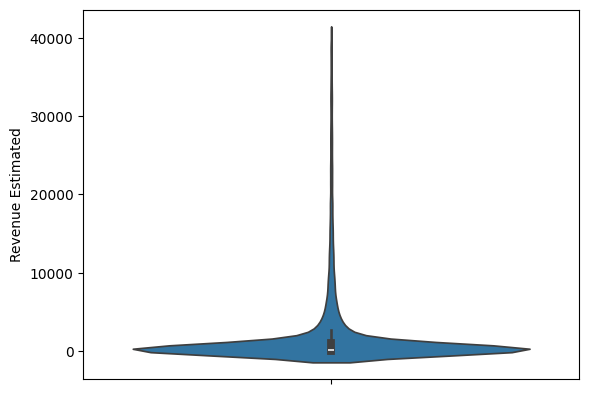

In [15]:
indies = df_rev[df_rev['is_aaa'] == 0]
indies = indies[indies['Revenue Estimated'] < 40000]
g = sns.violinplot(data=indies, y='Revenue Estimated')

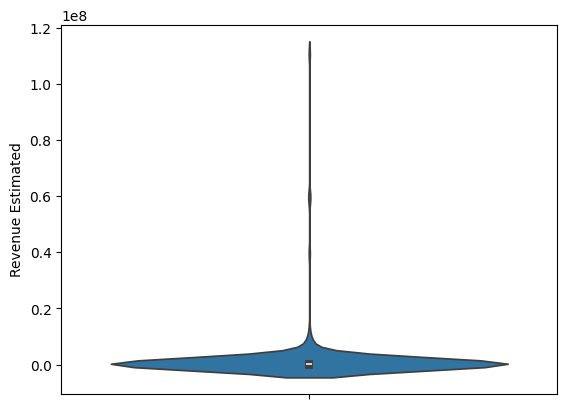

In [16]:
aaa = df_rev[df_rev['is_aaa'] == 1]
h = sns.violinplot(data=aaa, y='Revenue Estimated')

The idea is to show that the majority of games do not perform exceptionally well (illustrated by the widest part of the graph sitting around the 0 mark). \
This visualisation does not explicitly show the fact that a AAA game which did 'not perform exceptionally well' makes significantly more money than an indie one.